In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
# Load the dataset
file_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Tsunami_Cut.csv'
tsunami_data = pd.read_csv(file_path)
tsunami_data.head()

,Year,Mo,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Vol,Deposits,Country,Location Name,Latitude,...,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Total Deaths,Total Death Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
0,-2000,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN
1,-1610,NaN,4,6.0,NaN,1351.0,28,GREECE,THERA ISLAND (SANTORINI),36.400,...,NaN,3.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
2,-1365,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,-1300,NaN,2,0.0,6.0,NaN,0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-760,NaN,2,0.0,NaN,NaN,0,ISRAEL,ISRAEL AND LEBANON COASTS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Aggregate the data by country to compute mean values of relevant attributes including Number of Runups and Tsunami Intensity
country_aggregated_full = tsunami_data.groupby('Country').agg({
    'Earthquake Magnitude': 'mean',
    'Maximum Water Height (m)': 'mean',
    'Number of Runups': 'mean',
    'Tsunami Intensity': 'mean'
}).reset_index()

In [4]:
# Fill missing values in numerical columns with the mean of the column
numeric_columns = ['Earthquake Magnitude', 'Maximum Water Height (m)', 'Number of Runups', 'Tsunami Intensity']
country_aggregated_full[numeric_columns] = country_aggregated_full[numeric_columns].fillna(country_aggregated_full[numeric_columns].mean())

In [5]:
# Standardize the features for clustering
scaler = StandardScaler()
scaled_country_features_full = scaler.fit_transform(country_aggregated_full[numeric_columns])

In [6]:
# Define the models
models = {
    'KMeans': KMeans(n_clusters=30, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=30),
    'Birch': Birch(n_clusters=30)
}

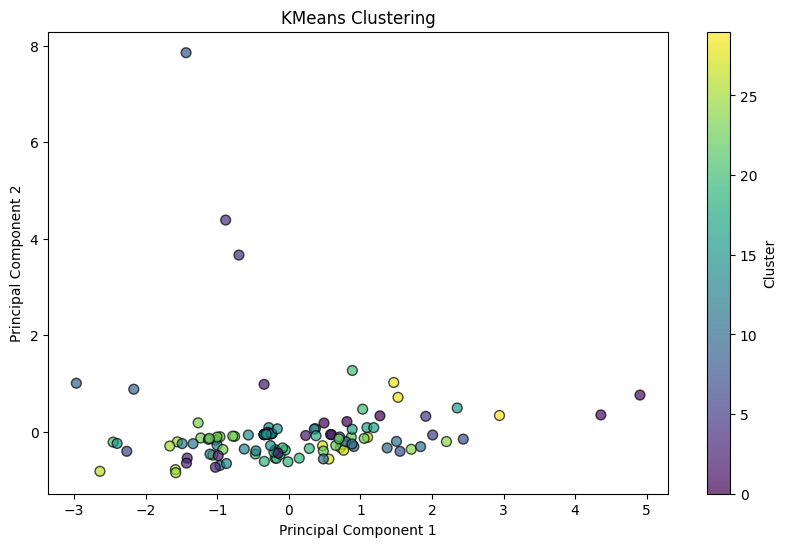

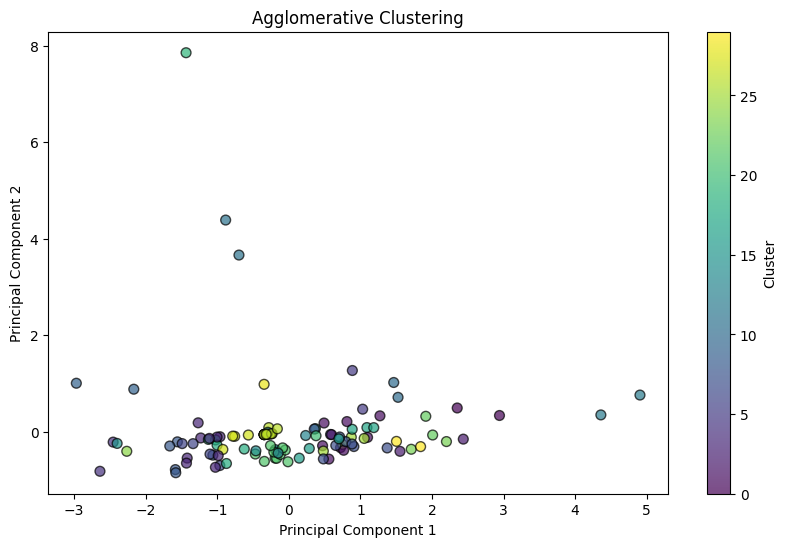

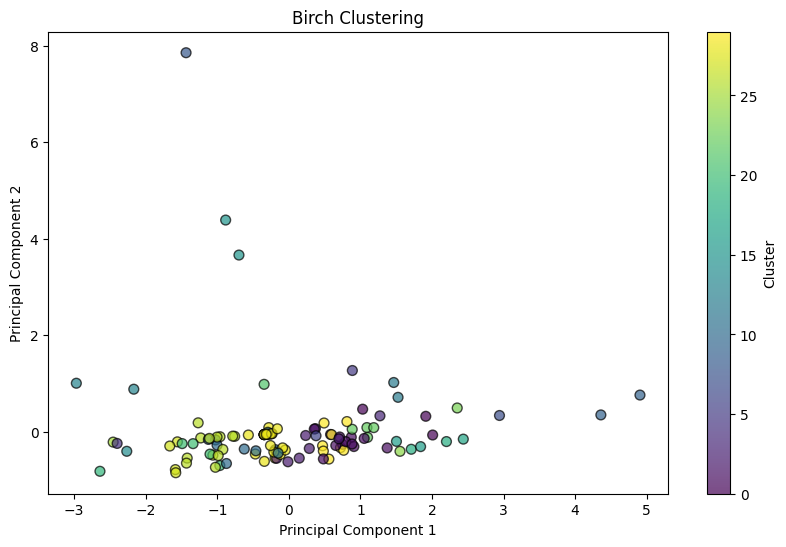

In [7]:
# Fit the models and visualziaton
results = {}
visualization_paths = []
for name, model in models.items():
    model.fit(scaled_country_features_full)
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(scaled_country_features_full)
    
    silhouette_avg = silhouette_score(scaled_country_features_full, labels)
    davies_bouldin = davies_bouldin_score(scaled_country_features_full, labels)
    calinski_harabasz = calinski_harabasz_score(scaled_country_features_full, labels)
    
    results[name] = {
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    }
    
    # Add cluster labels to the DataFrame
    country_aggregated_full[name + '_Cluster'] = labels

    # Visualize the clustering result
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_country_features_full)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    plt.title(f'{name} Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

In [8]:
# Save the clustering results to Excel files
output_kmeans_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Country_Aggregated_Clusters_KMeans.xlsx'
output_agglomerative_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Country_Aggregated_Clusters_Agglomerative.xlsx'
output_birch_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Country_Aggregated_Clusters_Birch.xlsx'
output_comparison_path = r'C:\Users\ungdu\Downloads\Smart-Decision\Clustering_Comparison.xlsx'

country_aggregated_full[['Country', 'Earthquake Magnitude', 'Maximum Water Height (m)', 'Number of Runups', 'Tsunami Intensity', 'KMeans_Cluster']].to_excel(output_kmeans_path, index=False)
country_aggregated_full[['Country', 'Earthquake Magnitude', 'Maximum Water Height (m)', 'Number of Runups', 'Tsunami Intensity', 'Agglomerative_Cluster']].to_excel(output_agglomerative_path, index=False)
country_aggregated_full[['Country', 'Earthquake Magnitude', 'Maximum Water Height (m)', 'Number of Runups', 'Tsunami Intensity', 'Birch_Cluster']].to_excel(output_birch_path, index=False)

In [9]:

# Convert results to DataFrame for comparison and save to Excel
results_df = pd.DataFrame(results).T
results_df.to_excel(output_comparison_path)

(output_kmeans_path, output_agglomerative_path, output_birch_path, output_comparison_path)

('C:\\Users\\ungdu\\Downloads\\Smart-Decision\\Country_Aggregated_Clusters_KMeans.xlsx',
 'C:\\Users\\ungdu\\Downloads\\Smart-Decision\\Country_Aggregated_Clusters_Agglomerative.xlsx',
 'C:\\Users\\ungdu\\Downloads\\Smart-Decision\\Country_Aggregated_Clusters_Birch.xlsx',
 'C:\\Users\\ungdu\\Downloads\\Smart-Decision\\Clustering_Comparison.xlsx')